In [1]:
import torch 
import torch.nn.functional as F


In [2]:
import torch 
import torch.nn.functional as F


In [3]:
import torch 
import torch.nn.functional as F


In [4]:
import torch 
import torch.nn.functional as F


In [5]:
x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[0], [0], [1]])


In [6]:
# 定义一个Logistic回归模型类，继承自PyTorch中的nn.Module类
class LogisticRegressionModel(torch.nn.Module):
    # 初始化函数
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()  # 调用父类的初始化函数
        # 定义线性层，1个输入特征（x）和1个输出特征（y）
        self.linear = torch.nn.Linear(1, 1)

    # 前向传播函数
    def forward(self, x):
        # 使用sigmoid激活函数进行预测
        y_pred = F.sigmoid(self.linear(x))
        return y_pred


# 创建一个Logistic回归模型实例
model = LogisticRegressionModel()


In [7]:
# 定义二元交叉熵损失函数，size_average参数表示输出是否被平均
criterion = torch.nn.BCELoss(size_average=False)

# 定义随机梯度下降优化器，使用model.parameters()获取需要更新的参数，学习率为0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


/opt/homebrew/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [8]:
# 设置训练循环，将数据集中的所有样本迭代1000次(epoch)
for epoch in range(1000):
    # 运行模型(model)以获取对当前输入(x_data)的预测(y_pred)
    y_pred = model(x_data)
    # 计算损失(loss)，这是神经网络误差的度量，损失越小代表模型拟合得越好
    loss = criterion(y_pred, y_data)
    
    # 打印当前epoch和对应的损失值
    print(epoch, loss.item())

    # 重置优化器的梯度为零，以防止它们在计算下一个batch的梯度时被累积
    optimizer.zero_grad()
    # 在当前batch上计算梯度，并反向传播到模型的每个参数上
    loss.backward()
    # 更新模型参数，以使其更好地拟合训练数据。此处使用优化器(optimizer)来更新权重/偏置
    optimizer.step()


0 3.13102388381958
1 3.068330764770508
2 3.0072414875030518
3 2.947793483734131
4 2.8900198936462402
5 2.8339524269104004
6 2.7796173095703125
7 2.7270374298095703
8 2.6762301921844482
9 2.6272096633911133
10 2.579983949661255
11 2.5345563888549805
12 2.490924596786499
13 2.4490809440612793
14 2.409013271331787
15 2.3707034587860107
16 2.334127902984619
17 2.2992594242095947
18 2.2660648822784424
19 2.2345075607299805
20 2.204547166824341
21 2.1761388778686523
22 2.149235725402832
23 2.1237878799438477
24 2.099742889404297
25 2.07704758644104
26 2.0556464195251465
27 2.0354838371276855
28 2.0165038108825684
29 1.9986499547958374
30 1.9818662405014038
31 1.9660977125167847
32 1.9512898921966553
33 1.9373899698257446
34 1.9243459701538086
35 1.9121079444885254
36 1.900627613067627
37 1.8898582458496094
38 1.8797553777694702
39 1.8702764511108398
40 1.8613804578781128
41 1.8530291318893433
42 1.8451858758926392
43 1.837815761566162
44 1.8308863639831543
45 1.824366807937622
46 1.818228125

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# 创建一个包含200个等距样本的数组
x = np.linspace(0, 10, 200)

# 将NumPy数组转换为PyTorch张量，并调整其形状为200行1列
x_t = torch.Tensor(x).view((200, 1))

# 使用名为“model”的预训练模型对输入进行前向传递，得到输出值
y_t = model(x_t)

# 将PyTorch张量转换为NumPy数组
y = y_t.data.numpy()

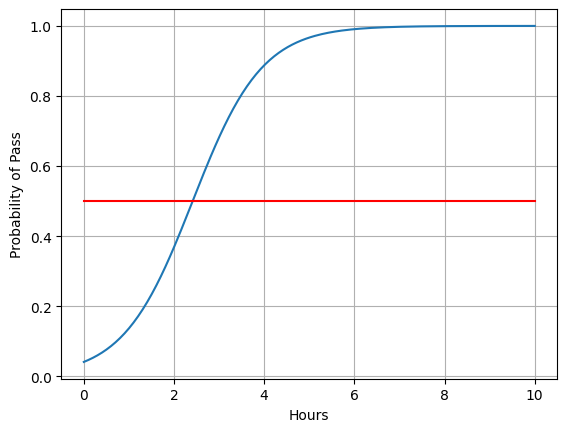

In [11]:
plt.plot(x, y)
plt.plot([0, 10], [0.5, 0.5], c='r')
plt.xlabel('Hours')
plt.ylabel('Probability of Pass')
plt.grid()
plt.show()
